# Movie Recommender Systems and Analysis Using Machine Learning

# importing libraries

In [94]:
import numpy as np
import pandas as pd

#for data visaulization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#for jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

#for interactive shells
from IPython.display import display

#supress warninings 
import warnings
warnings.filterwarnings('ignore')

#setting up the charty size and background
plt.rcParams['figure.figsize']=(16,5)
plt.style.use('fivethirtyeight')

# import the Dataset

In [95]:
#Read The Dataset
data =pd.read_csv('movie_metadata.csv')

In [96]:
#check shape of data
print(data.shape)

(5043, 28)


In [97]:
#check the column info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [98]:
#remove unnecessary columns from data
#use the drop() function to drop unncessary columns

data = data.drop(['color',
                 'director_facebook_likes',
                 'actor_3_facebook_likes',
                 'actor_1_facebook_likes',
                 'cast_total_facebook_likes',
                 'actor_2_facebook_likes',
                 'facenumber_in_poster',
                 'content_rating',
                 'country',
                 'movie_imdb_link',
                 'aspect_ratio',
                 'plot_keywords',
                 ],
                axis =1)
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

# Missing values treatment

In [99]:
#check thr row having high percentage of missing values in dataset
round(100*(data.isnull().sum()/len(data.index)),2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [100]:
#since 'gross' and 'budget' columns have large number of Nan values drop all the rows with NaNs at this columns
#using the 'isnan' function of numpy alongwith a regation '~'

data =data[~np.isnan(data['gross'])]
data =data[~np.isnan(data['budget'])]

In [101]:
#check missing values again
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [102]:
#the rows for which the sum of null is less than two are retained

data =data[data.isnull().sum(axis=1) <= 2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [103]:
#let impute the missing values 

#using mean for numeriacl columns
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace=True)
data['duration'].fillna(data['duration'].mean(), inplace =True)

#using mode for categorical column
data['language'].fillna(data['language'].mode()[0], inplace=True)

#as we know that we cannot use statistical values for imputing the missing values of actor name
#so we will replace actor names with 'unkown actor'

data['actor_2_name'].fillna('Unkown Actor', inplace =True)
data['actor_3_name'].fillna('Unkown Actor', inplace =True)

#as we imputed all the missing values let check thr no. of total missing values in dataset
data.isnull().sum().sum()

0

# feature Engineering

In [104]:
#convert the gross and budget from $ to million $ to make easy the outlier

data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000



In [105]:
#create a profit column using the budget and gross

data['Profit'] = data['gross'] - data['budget']

In [106]:
#check the name of 10 profitable movies

data[['Profit','movie_title']].sort_values(by ='Profit', ascending =False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [107]:
#by looking to the above results we can easily analyze that there are some dublicates

#lets print the no. of rows before removing duplicates
print("No. of Rows Before Removing Duplicates:", data.shape[0])
data.drop_duplicates(subset = None, keep ='first', inplace = True)

#let print the no. of rows after removing duplicates
print("No. of Rows after Removing Duplicates:", data.shape[0])


No. of Rows Before Removing Duplicates: 3888
No. of Rows after Removing Duplicates: 3853


In [108]:
#check the name of 10 profitable movies

data[['movie_title','Profit']].sort_values(by ='Profit', ascending =False).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


In [109]:
 #check the values of the lanagiange column
data['language'].value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Hebrew           3
Danish           3
Thai             3
Persian          3
Aboriginal       2
Indonesian       2
Dari             2
Filipino         1
Kazakh           1
Hungarian        1
Dzongkha         1
Romanian         1
Arabic           1
Russian          1
None             1
Zulu             1
Vietnamese       1
Aramaic          1
Telugu           1
Maya             1
Bosnian          1
Mongolian        1
Icelandic        1
Swedish          1
Czech            1
Name: language, dtype: int64

In [110]:
#looking at the above output we can easily observe that out of 3500 movies, only 1500 movie are for other languages

#so it is better to keep only langauage that is english and foreign

def language(x):
    if x=='English':
        return 'English'
    else:
        return 'Foreign'
    
#let apply the function on the langauge column
data['language'] =data['language'].apply(language)

#check the values again
data['language'].value_counts()

English    3673
Foreign     180
Name: language, dtype: int64

In [111]:
data['duration'].value_counts()

101.0    113
100.0    109
98.0     105
95.0      97
90.0      97
        ... 
197.0      1
63.0       1
293.0      1
200.0      1
330.0      1
Name: duration, Length: 157, dtype: int64

In [112]:
#looking at the duration of movies is not varying a lot we know the most of the users either like to watch long movies or short movies

#duration movie. we can categorize the movies in two part, long and short

def duration(x):
    if x <=120:
        return 'Short'
    else:
        return 'Long'
    
#let apply the function on the langauge column
data['duration'] =data['duration'].apply(duration)

#check the values again
data['duration'].value_counts()

Short    2936
Long      917
Name: duration, dtype: int64

In [113]:
#check the value of the genres column

data['genres'].value_counts()

Drama                                                       153
Comedy|Drama|Romance                                        151
Comedy|Drama                                                147
Comedy                                                      145
Comedy|Romance                                              135
                                                           ... 
Crime|Documentary|War                                         1
Drama|Family|Musical                                          1
Comedy|Crime|Mystery|Romance                                  1
Adventure|Animation|Drama|Family|History|Musical|Romance      1
Drama|Mystery|Romance|Sci-Fi|Thriller                         1
Name: genres, Length: 762, dtype: int64

In [114]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [115]:
#we can see from the above output that most of the movie are having alot og genre
#also, a movie can have so many genre so lets keep four genres

data['Moviegenres'] =data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

#some of the movies have only one genre, in such time assign the same genre to genre_2 also

data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) >1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) >2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) >3 else x[0])

#check the head of the data
data[['genres', 'Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice                  0.001600
1    150                        Ghostbusters                  0.001076
2   1582                        Ghostbusters                  0.001076
3     96                        Interstellar                  0.001025
4   3015               10 Days in a Madhouse                  0.000828
5    945                      Into the Woods                  0.000693
6     73                       Suicide Squad                  0.000653
7   1190                Fifty Shades of Grey                  0.000624
8    108                            Warcraft                  0.000623
9     92        Independence Day: Resurgence                  0.000599


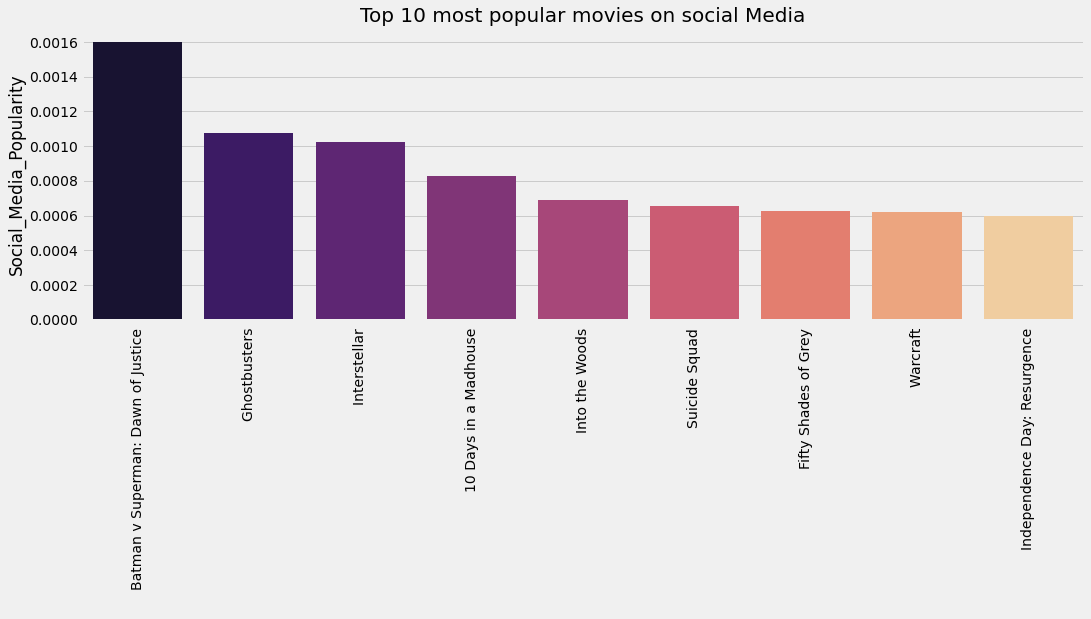

In [116]:
#lets also calculate the socail media popularity of a movie
#to calculate popularity of a movie we can aggregate No. voted users for review and facebook likes

data['Social_Media_Popularity'] = ((data['num_user_for_reviews']/data['num_voted_users'])*(data['movie_facebook_likes']))/1000000

#lets also check the top 10 most popular movies on social media
x =data[['movie_title','Social_Media_Popularity']].sort_values(by ='Social_Media_Popularity',
                                                               ascending =False).head(10).reset_index()
print(x)
sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette ='magma')
plt.title('Top 10 most popular movies on social Media', fontsize =20)
plt.xticks(rotation =90, fontsize =14)
plt.xlabel(' ')
plt.show()

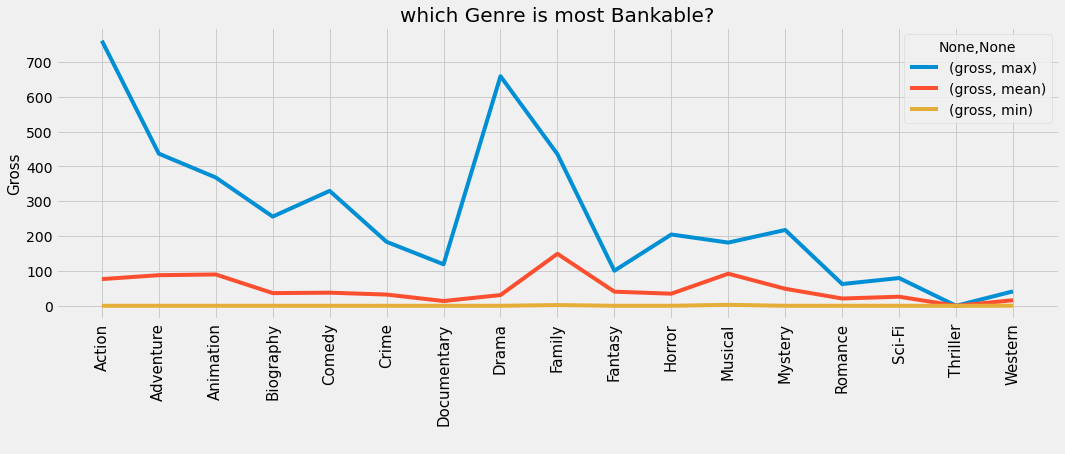

In [117]:
#Compare the grosss with genres

#first group the genres and get max min and avg gross of the movies of that genres

display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap ='Wistia'))

#plot these values using lineplot
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind ='line')
plt.title('which Genre is most Bankable?', fontsize =20)
plt.xticks(np.arange(17),['Action','Adventure', 'Animation','Biography','Comedy','Crime', 
                          'Documentary','Drama','Family','Fantasy','Horror','Musical',
                          'Mystery', 'Romance','Sci-Fi','Thriller','Western'], rotation =90, fontsize=15)                                       
plt.ylabel('Gross',fontsize =15)
plt.xlabel(' ',)
plt.show()

In [118]:
print('The most Profitable Movies from each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                                    'movie_title','gross']].style.background_gradient(cmap ='copper'))

The most Profitable Movies from each Genre


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [119]:
#convert year into integer
data['title_year'] = data['title_year'].astype('int')

In [121]:
print('The most Profitable years of box office')
display(data[['title_year','language','Profit']].groupby(['language','title_year'])
        .agg('sum').sort_values(by= 'Profit', ascending =False).head(10).style.background_gradient(cmap ='Greens'))

The most Profitable years of box office


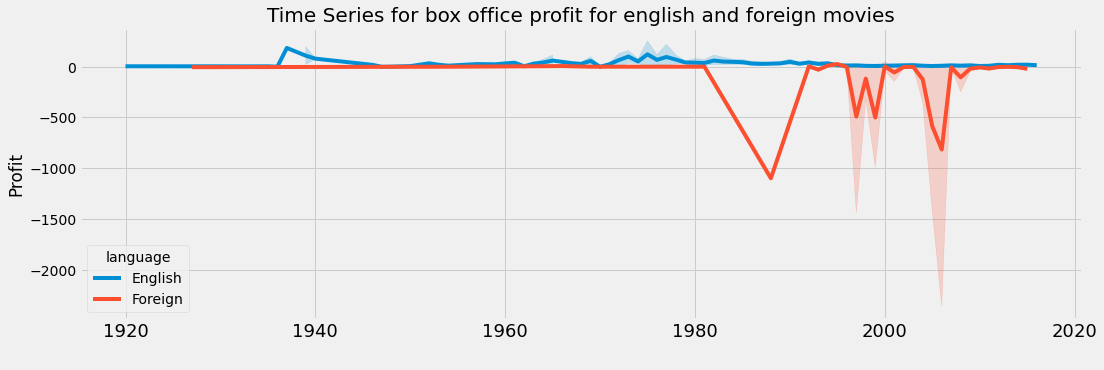

In [123]:
#plot profit of english and foreign language movies
sns.lineplot(data['title_year'], data['Profit'], hue =data['language'])
plt.title('Time Series for box office profit for english and foreign movies', fontsize =20)
                                      
plt.xticks(fontsize =18)
plt.xlabel(' ')
plt.show()

In [124]:
print('Movies that made huge losses')
display(data[data['Profit'] <-2000][['movie_title',
                                    'language','Profit']].style.background_gradient(cmap ='Reds'))


Movies that made huge losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


In [125]:
#short and long durition movies
display(data[data['duration'] == 'Long'][['movie_title','duration','gross','Profit']]
       .sort_values(by = 'Profit', ascending =False).head(5).style.background_gradient(cmap ='spring'))
display(data[data['duration'] == 'Short'][['movie_title','duration','gross','Profit']]
       .sort_values(by = 'Profit', ascending =False).head(5).style.background_gradient(cmap ='spring'))

,movie_title,duration,gross,Profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
17,The Avengers,Long,623.279547,403.279547


,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,Short,434.949459,424.449459
509,The Lion King,Short,422.783777,377.783777
812,Deadpool,Short,363.024263,305.024263
521,Despicable Me 2,Short,368.049635,292.049635
338,Finding Nemo,Short,380.838870,286.838870


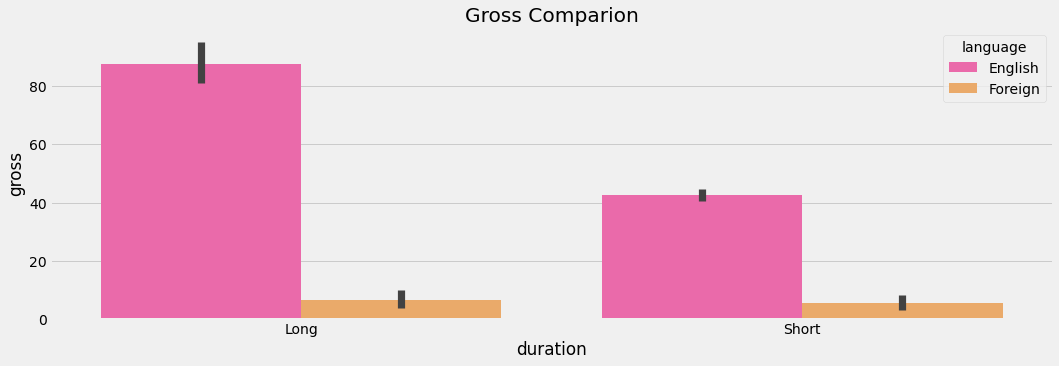

In [126]:
sns.barplot(data['duration'], data['gross'],hue=data['language'], palette ='spring')
plt.title('Gross Comparion')
plt.show()

In [127]:
print("Average IMDB score for Long Duration Movies is {0:.2f}".format(data[data['duration']=='Long']['imdb_score'].mean()))
print("Average IMDB score for Short Duration Movies is {0:.2f}".format(data[data['duration']=='Short']['imdb_score'].mean()))

Average IMDB score for Long Duration Movies is 7.06
Average IMDB score for Short Duration Movies is 6.28


In [129]:
print("\nHighest Rated Long Duration Movie\n",
      data[data['duration']=='Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending =False).head(2))
print("\nHighest Rated Short Duration Movie\n",
      data[data['duration']=='Short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending =False).head(2))


Highest Rated Long Duration Movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3
3466             The Godfather          9.2

Highest Rated Short Duration Movie
               movie_title  imdb_score
3592  The Usual Suspects          8.6
3175  American History X          8.6


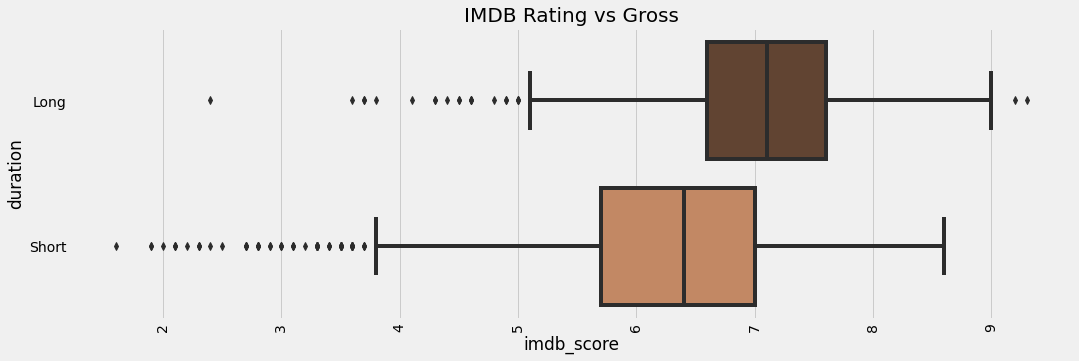

In [130]:
sns.boxplot(data['imdb_score'], data['duration'],palette ='copper')
plt.title('IMDB Rating vs Gross', fontsize =20)
plt.xticks(rotation =90)
plt.show()

In [136]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x =a.append(b)
    y =x.append(c)
    
    y =y[['movie_title',
         'budget',
         'title_year',
         'genres',
         'language',
         'imdb_score',
         ]]
    return y

In [137]:
query_actors('Meryl Streep')

,movie_title,budget,title_year,genres,language,imdb_score
410,It's Complicated,85.0,2009,Comedy|Drama|Romance,English,6.6
1106,The River Wild,45.0,1994,Action|Adventure|Crime|Thriller,English,6.3
1204,Julie & Julia,40.0,2009,Biography|Drama|Romance,English,7.0
1408,The Devil Wears Prada,35.0,2006,Comedy|Drama|Romance,English,6.8
1483,Lions for Lambs,35.0,2007,Drama|Thriller|War,English,6.2
1575,Out of Africa,31.0,1985,Biography|Drama|Romance,English,7.2
1618,Hope Springs,30.0,2012,Comedy|Drama|Romance,English,6.3
1674,One True Thing,30.0,1998,Drama,English,7.0
1925,The Hours,25.0,2002,Drama|Romance,English,7.6
2781,The Iron Lady,13.0,2011,Biography|Drama|History,English,6.4


In [144]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x =a.append(b)
    y =x.append(c)
    print("Time:", y['title_year'].min(), y['title_year'].max())
    print("Max Gross:{0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross:{0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross:{0:.2f} Millions".format(y['gross'].min()))
    print("Number of 100 Millions :",y[y['gross'] > 100].shape[0])
    print("Avg IMDB score:\n{0:.2f}".format(y['imdb_score'].mean()))
    print("Most common Genres:\n",y['Genre1'].value_counts().head())
actors_report('Meryl Streep')
        

Time: 1985 2014
Max Gross:143.70 Millions
Avg Gross:55.23 Millions
Min Gross:9.66 Millions
Number of 100 Millions : 4
Avg IMDB score:
6.81
Most common Genres:
 Drama        9
Comedy       7
Biography    3
Adventure    3
Action       1
Name: Genre1, dtype: int64


In [145]:
#comapre brad pitt, Leonardo Caprio and tom cruise
def critically_acclaimed_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x =a.append(b)
    y =x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')


print("Number of Critics Reviews for Brad Pitt")
display(critically_acclaimed_actors('Brad Pitt'))

print("Number of Critics Reviews for Leonardo DiCaprio")
display(critically_acclaimed_actors('Leonardo DiCaprio'))

print("Number of Critics Reviews for Tom Cruise")
display(critically_acclaimed_actors('Tom Cruise'))

    

actors_report('Meryl Streep')
        

Number of Critics Reviews for Brad Pitt


7814

Number of Critics Reviews for Leonardo DiCaprio


7014

Number of Critics Reviews for Tom Cruise


6740

Time: 1985 2014
Max Gross:143.70 Millions
Avg Gross:55.23 Millions
Min Gross:9.66 Millions
Number of 100 Millions : 4
Avg IMDB score:
6.81
Most common Genres:
 Drama        9
Comedy       7
Biography    3
Adventure    3
Action       1
Name: Genre1, dtype: int64


In [147]:
pd.set_option('max_rows', 3000)

@interact
def show_movie_more_than(column='imdb_score', score=9.0):
    x = data.loc[data[column] > score][['title_year','movie_title',
                                       'director_name',
                                       'actor_1_name',
                                       'actor_2_name',
                                       'actor_3_name',
                                       'Profit',
                                       'imdb_score',
                                       ]]
    x =x.sort_values(by ='imdb_score', ascending =False)
    x =x.drop_duplicates(keep ='first')
    return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [149]:
pd.set_option('max_rows', 3000)

@interact
def show_articles_more_than(column=['budget', 'gross'], x=1000):
    return data.loc[data[column] > x][['movie_title','duration','gross','Profit','imdb_score']]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

# Recommending Movies Based on language

In [156]:
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language']==x]
    y = y.sort_values(by ='imdb_score', ascending =False)
    return y.head(15)

In [157]:
recommend_lang('Foreign')

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
4921,Foreign,Children of Heaven,8.5
4259,Foreign,The Lives of Others,8.5
3931,Foreign,Samsara,8.5
4659,Foreign,A Separation,8.4
1329,Foreign,Baahubali: The Beginning,8.4
2970,Foreign,Das Boot,8.4


In [158]:
recommend_lang('English')

,language,movie_title,imdb_score
1937,English,The Shawshank Redemption,9.3
3466,English,The Godfather,9.2
2837,English,The Godfather: Part II,9.0
66,English,The Dark Knight,9.0
3355,English,Pulp Fiction,8.9
1874,English,Schindler's List,8.9
339,English,The Lord of the Rings: The Return of the King,8.9
683,English,Fight Club,8.8
270,English,The Lord of the Rings: The Fellowship of the R...,8.8
2051,English,Star Wars: Episode V - The Empire Strikes Back,8.8


# Recommeding movies based on actors

In [159]:
def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    x =a.append(b)
    y =x.append(c)
    a =a.sort_values(by ='imdb_score', ascending =False)
    return a.head(15)

In [160]:
recommend_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
158,The Last Samurai,7.7
284,Minority Report,7.7
736,Collateral,7.6
1524,A Few Good Men,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
930,Jerry Maguire,7.3
671,Eyes Wide Shut,7.3


# Recommeding Movies of Similar Genres

In [164]:
from mlxtend.preprocessing import TransactionEncoder
x =data['genres'].str.split('|')
te = TransactionEncoder()
x =te.fit_transform(x)
x =pd.DataFrame(x, columns =te.columns_)

#check the head of x
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [165]:
#convert this data into boolean so that we can perform calculation
genres =x.astype('int')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [166]:
#insert the movie title in the fist columnm so that we can better unserdatnd the data
genres.insert(0, 'movie_title', data['movie_title'])

genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [167]:
genres =genres.set_index('movie_title')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [168]:
#make a recommendation engine for getting similar genres

def recommendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending =False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)

In [169]:
recommendation_genres('Action')

Adventure    0.320532
Thriller     0.303708
Sci-Fi       0.295018
dtype: float64

# Recommending Similar Movies

In [174]:
x= genres.transpose()
x.head()


movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,Four Weddings and a Funeral,NaN,NaN,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [179]:
#make a recommendation engine for getting similar movies

def recommendation_movie(movie):
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending =False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

In [180]:
recommendation_movie('The Expendables')

movie_title
Rudderless               1.0
A View to a Kill         1.0
NaN                      1.0
Letters to Juliet        1.0
NaN                      1.0
Flipped                  1.0
NaN                      1.0
The Abyss                1.0
Miss Potter              1.0
NaN                      1.0
Insidious: Chapter 3     1.0
Wing Commander           1.0
Predator                 1.0
The Players Club         1.0
Big                      1.0
Boogeyman                1.0
Amen.                    1.0
Down to Earth            1.0
Hamlet                   1.0
NaN                      1.0
dtype: float64